In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import glob
import cv2
from PIL import Image
import time
import joblib

In [37]:
def get_data(path, SIZE=(128, 128)):
    labels = []
    images = []
    counter = 1
    for image_path in glob.glob(path):
        label = image_path[image_path.index('/')+1:image_path.index('-')]
        labels.append(label)
        img = cv2.imread(image_path)
        img = cv2.resize(img, SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        if counter % 200 == 0:
            print(f'Loaded {counter} images')
        counter += 1

    return np.array(images), np.array(labels)


In [38]:
X, y = get_data('images/*')
print('X, y', X.shape, y.shape)

Loaded 200 images
Loaded 400 images
Loaded 600 images
Loaded 800 images
Loaded 1000 images
Loaded 1200 images
Loaded 1400 images
Loaded 1600 images
Loaded 1800 images
Loaded 2000 images
Loaded 2200 images
Loaded 2400 images
Loaded 2600 images
Loaded 2800 images
Loaded 3000 images
Loaded 3200 images
Loaded 3400 images
Loaded 3600 images
Loaded 3800 images
Loaded 4000 images
X, y (4000, 128, 128, 3) (4000,)


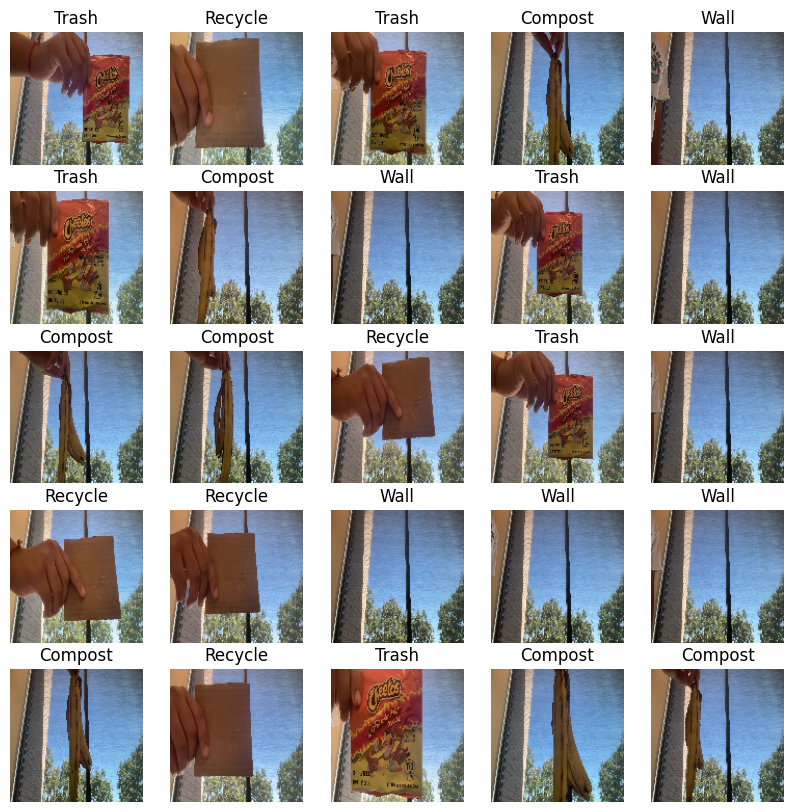

In [39]:
def plot_images(X_set, y_set, rows=5, cols=5):
    plt.figure(figsize=(10, 10))
    rand = np.random.uniform(0, X_set.shape[0], size=rows*cols).astype('int')
    for i in range(rows * cols):
        plt.subplot(rows, cols, i+1)
        plt.axis('off')
        plt.imshow(X_set[rand[i]])
        plt.title(y_set[rand[i]])
plot_images(X, y)

<AxesSubplot:ylabel='count'>

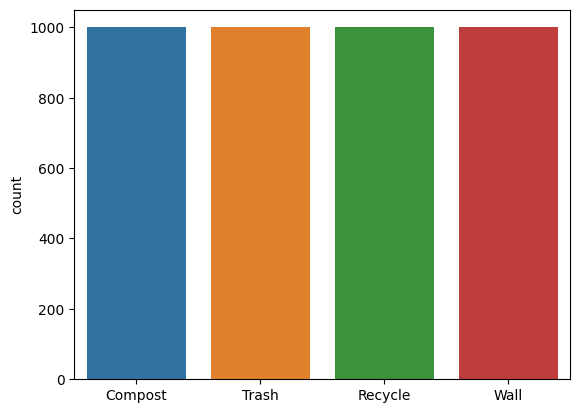

In [40]:
sns.countplot(x=y)

In [41]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

In [42]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
joblib.dump(le,'labelEncoder.joblib',compress=9)

['labelEncoder.joblib']

In [43]:
y[0], y[1], y[2]

(0, 2, 2)

In [44]:
y = to_categorical(y, num_classes=4)

In [45]:
y[0], y[1], y[2]

(array([1., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32))

In [46]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, Activation, Dropout, MaxPooling2D
from keras.optimizers import Adam
from keras.applications import ResNet50

In [47]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape = (128,128,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3), activation='relu'))  
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax')) # output

In [65]:
!pip install pydot

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='categorical_accuracy')

In [50]:
epochs = 10
batch_size = 64

In [51]:
history = model.fit(X, y, 
                    batch_size=batch_size, 
                    shuffle=True, 
                    epochs=epochs,
                    validation_split=0.2, 
                    steps_per_epoch=X.shape[0] // batch_size)
model.save('model.h5')

Epoch 1/10


2022-09-04 14:28:08.869992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - ETA: 0s - loss: 5.6252 - categorical_accuracy: 0.8624

2022-09-04 14:28:13.225626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - 5s 70ms/step - loss: 5.6252 - categorical_accuracy: 0.8624 - val_loss: 0.0075 - val_categorical_accuracy: 0.9975
Epoch 2/10
62/62 [==============================] - 4s 66ms/step - loss: 0.0096 - categorical_accuracy: 0.9970 - val_loss: 2.2894e-04 - val_categorical_accuracy: 1.0000
Epoch 3/10
62/62 [==============================] - 4s 62ms/step - loss: 0.0020 - categorical_accuracy: 0.9997 - val_loss: 2.7425e-04 - val_categorical_accuracy: 1.0000
Epoch 4/10
62/62 [==============================] - 4s 63ms/step - loss: 3.8423e-04 - categorical_accuracy: 1.0000 - val_loss: 8.4076e-08 - val_categorical_accuracy: 1.0000
Epoch 5/10
62/62 [==============================] - 4s 61ms/step - loss: 0.0011 - categorical_accuracy: 0.9995 - val_loss: 9.5282e-07 - val_categorical_accuracy: 1.0000
Epoch 6/10
62/62 [==============================] - 4s 62ms/step - loss: 0.0020 - categorical_accuracy: 0.9992 - val_loss: 1.5596e-07 - val_categorical_accuracy: 1.00

Text(0, 0.5, 'Accuracy')

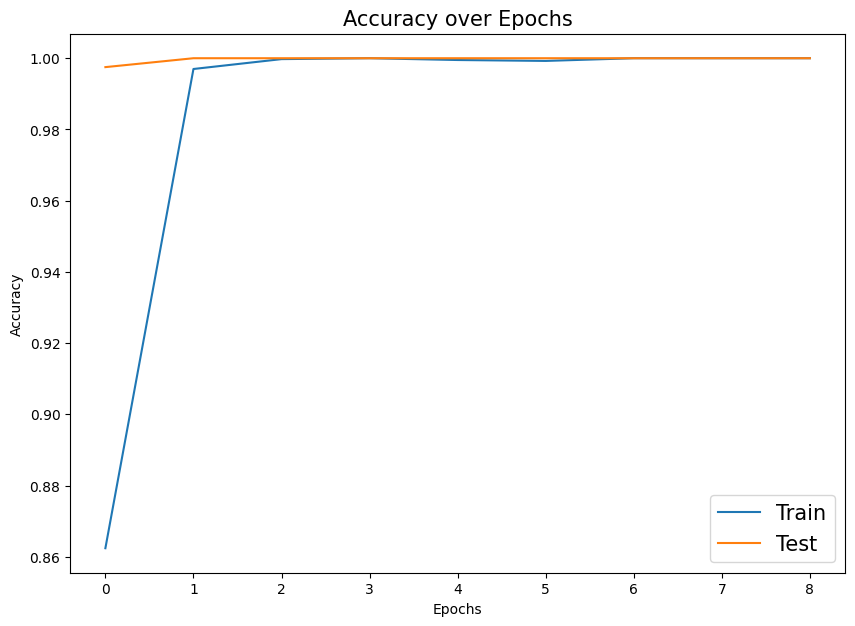

In [52]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['categorical_accuracy'], label='Train')
plt.plot(history.history['val_categorical_accuracy'], label='Test')
plt.title('Accuracy over Epochs', fontdict={'size':15})
plt.legend(loc='best', prop={'size': 15})
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

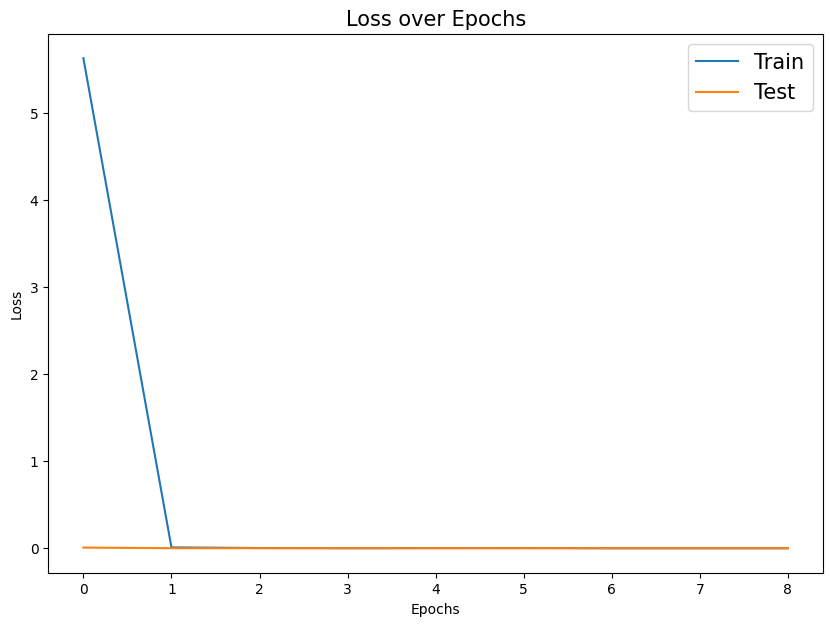

In [53]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss over Epochs', fontdict={'size':15})
plt.legend(loc='best', prop={'size': 15})
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import joblib

In [55]:
model = load_model('model.h5')
le = joblib.load('labelEncoder.joblib')

In [56]:
X_test, y_test = get_data('test_images/*')
X_test.shape, y_test.shape

Loaded 200 images
Loaded 400 images
Loaded 600 images


((663, 128, 128, 3), (663,))

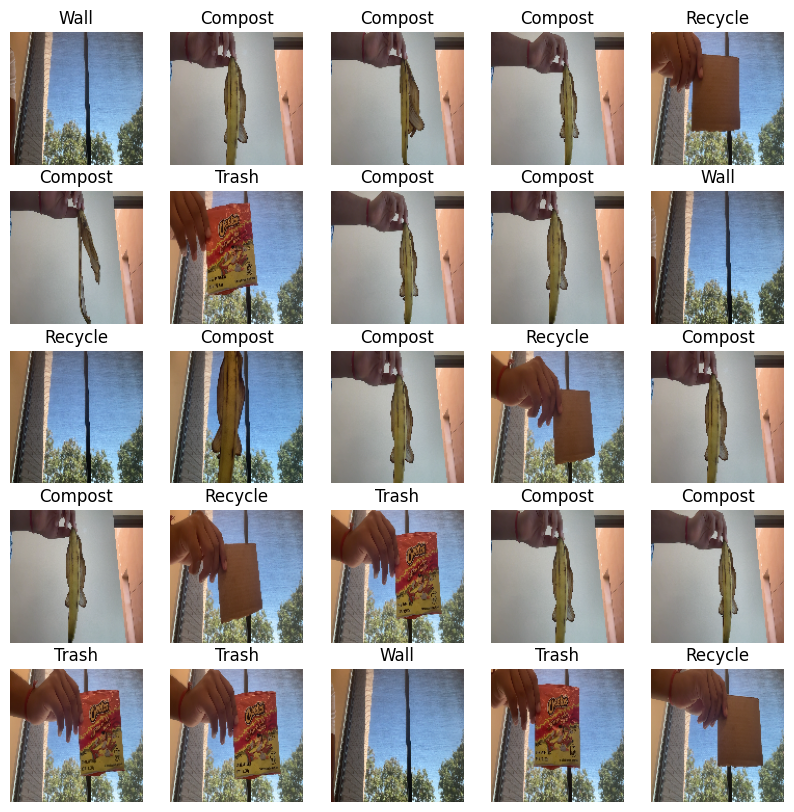

In [57]:
plot_images(X_test, y_test)

In [58]:
y_test = le.transform(y_test)
y_test = to_categorical(y_test, num_classes=4)
y_test[0]

array([1., 0., 0., 0.], dtype=float32)

In [59]:
for i in range(4):
    print(i, le.inverse_transform([i])[0])

0 Compost
1 Recycle
2 Trash
3 Wall


In [60]:
Y_test = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred))

 1/21 [>.............................] - ETA: 1s

2022-09-04 14:29:09.185138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       363
           1       0.33      0.10      0.15       100
           2       0.44      0.97      0.60       100
           3       0.92      1.00      0.96       100

    accuracy                           0.77       663
   macro avg       0.67      0.73      0.66       663
weighted avg       0.80      0.77      0.76       663



In [61]:
print('Accuracy', accuracy_score(Y_test, y_pred))

Accuracy 0.7677224736048266


<AxesSubplot:>

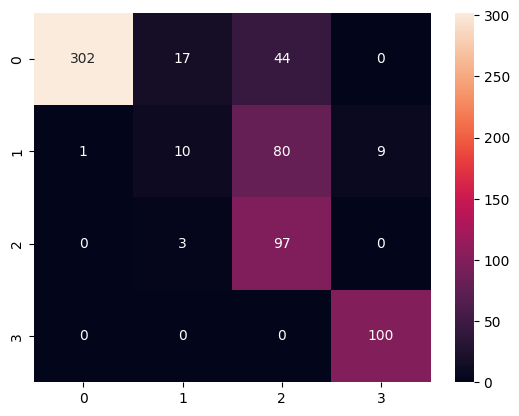

In [62]:
matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt= 'd')